In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r'C:\Users\sravi\Desktop\SEM 5\DV lab'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\sravi\Desktop\SEM 5\DV lab\gender_submission.csv
C:\Users\sravi\Desktop\SEM 5\DV lab\test.csv
C:\Users\sravi\Desktop\SEM 5\DV lab\titanic-survival-eda-classification-imputation.ipynb
C:\Users\sravi\Desktop\SEM 5\DV lab\train.csv
C:\Users\sravi\Desktop\SEM 5\DV lab\.ipynb_checkpoints\gender_submission-checkpoint.csv
C:\Users\sravi\Desktop\SEM 5\DV lab\.ipynb_checkpoints\test-checkpoint.csv
C:\Users\sravi\Desktop\SEM 5\DV lab\.ipynb_checkpoints\titanic-survival-eda-classification-imputation-checkpoint.ipynb


 ***1. Training the data***

In [7]:
data=pd.read_csv(r'C:\Users\sravi\Desktop\SEM 5\DV lab\train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
#sns.heatmap(data = data,annot=True)

 ***2. Replace the values in 'Embarked' column and make separate values for each of the following values it contains in that column. 
Note :  We are converting strings into int to prevent further errors that would occur in the followig steps***

In [11]:
data.Embarked.unique()
data['Embarked_s']=data['Embarked'].replace('Q',0).replace('C',0).replace('S',1)
data['Embarked_c']=data['Embarked'].replace('S',0).replace('Q',0).replace('C',1)
data['Embarked_q']=data['Embarked'].replace('C',0).replace('S',0).replace('Q',1)

C:\Users\sravi\AppData\Local\Temp\ipykernel_15760\4169363266.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Embarked_s']=data['Embarked'].replace('Q',0).replace('C',0).replace('S',1)
C:\Users\sravi\AppData\Local\Temp\ipykernel_15760\4169363266.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Embarked_c']=data['Embarked'].replace('S',0).replace('Q',0).replace('C',1)
C:\Users\sravi\AppData\Local\Temp\ipykernel_15760\4169363266.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remove

***Note: Conversion of str into int to avoid errors. ***

In [13]:
#data.Sex= data.Sex.map( {'M': 1, 'F': 0, 'O': 3} )
data['Sex'].replace( 'female', 0, inplace=True )
data['Sex'].replace( 'male', 1, inplace=True )
data

C:\Users\sravi\AppData\Local\Temp\ipykernel_15760\3066297377.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sex'].replace( 'female', 0, inplace=True )
C:\Users\sravi\AppData\Local\Temp\ipykernel_15760\3066297377.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_s,Embarked_c,Embarked_q
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,1.0,0.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,1.0,0.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0,0.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,0.0,1.0,0.0


***If you want to remove 0 value in 'Embarked' column then simply run the code given below and get the required data .***


In [19]:
#data=data[data.Embarked!=0]
#data=data[data[('Embarked')].map(data['Embarked'].value_counts())>0]*
#data

In [21]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Embarked_s       2
Embarked_c       2
Embarked_q       2
dtype: int64

***Inorder to fill the null values , simply type the follwing code given below.
Note:There is an alterative method to remove null values i.e 'IMPUTER . Check out 'trans'(will be done in the folllwing steps) where we simply impute the null values based on parameters applied to a specific imputer.*** 

<Axes: ylabel='count'>

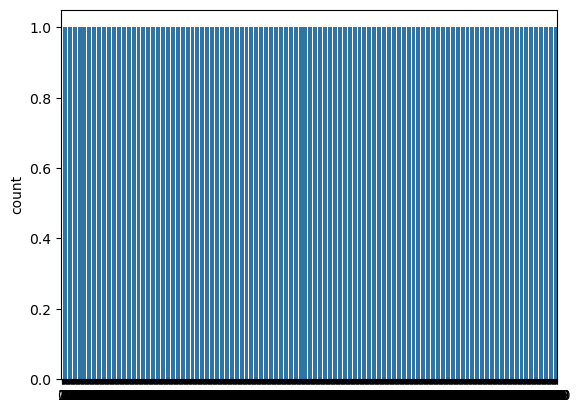

In [24]:
import seaborn as sns
sns.countplot(data.Survived)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Embarked_s   889 non-null    float64
 13  Embarked_c   889 non-null    float64
 14  Embarked_q   889 non-null    float64
dtypes: float64(5), int64(6), object(4)
memory usage: 104.5+ KB


In [26]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_s,Embarked_c,Embarked_q
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000,889.000000,889.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.724409,0.188976,0.086614
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.447063,0.391710,0.281427
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


<Axes: >

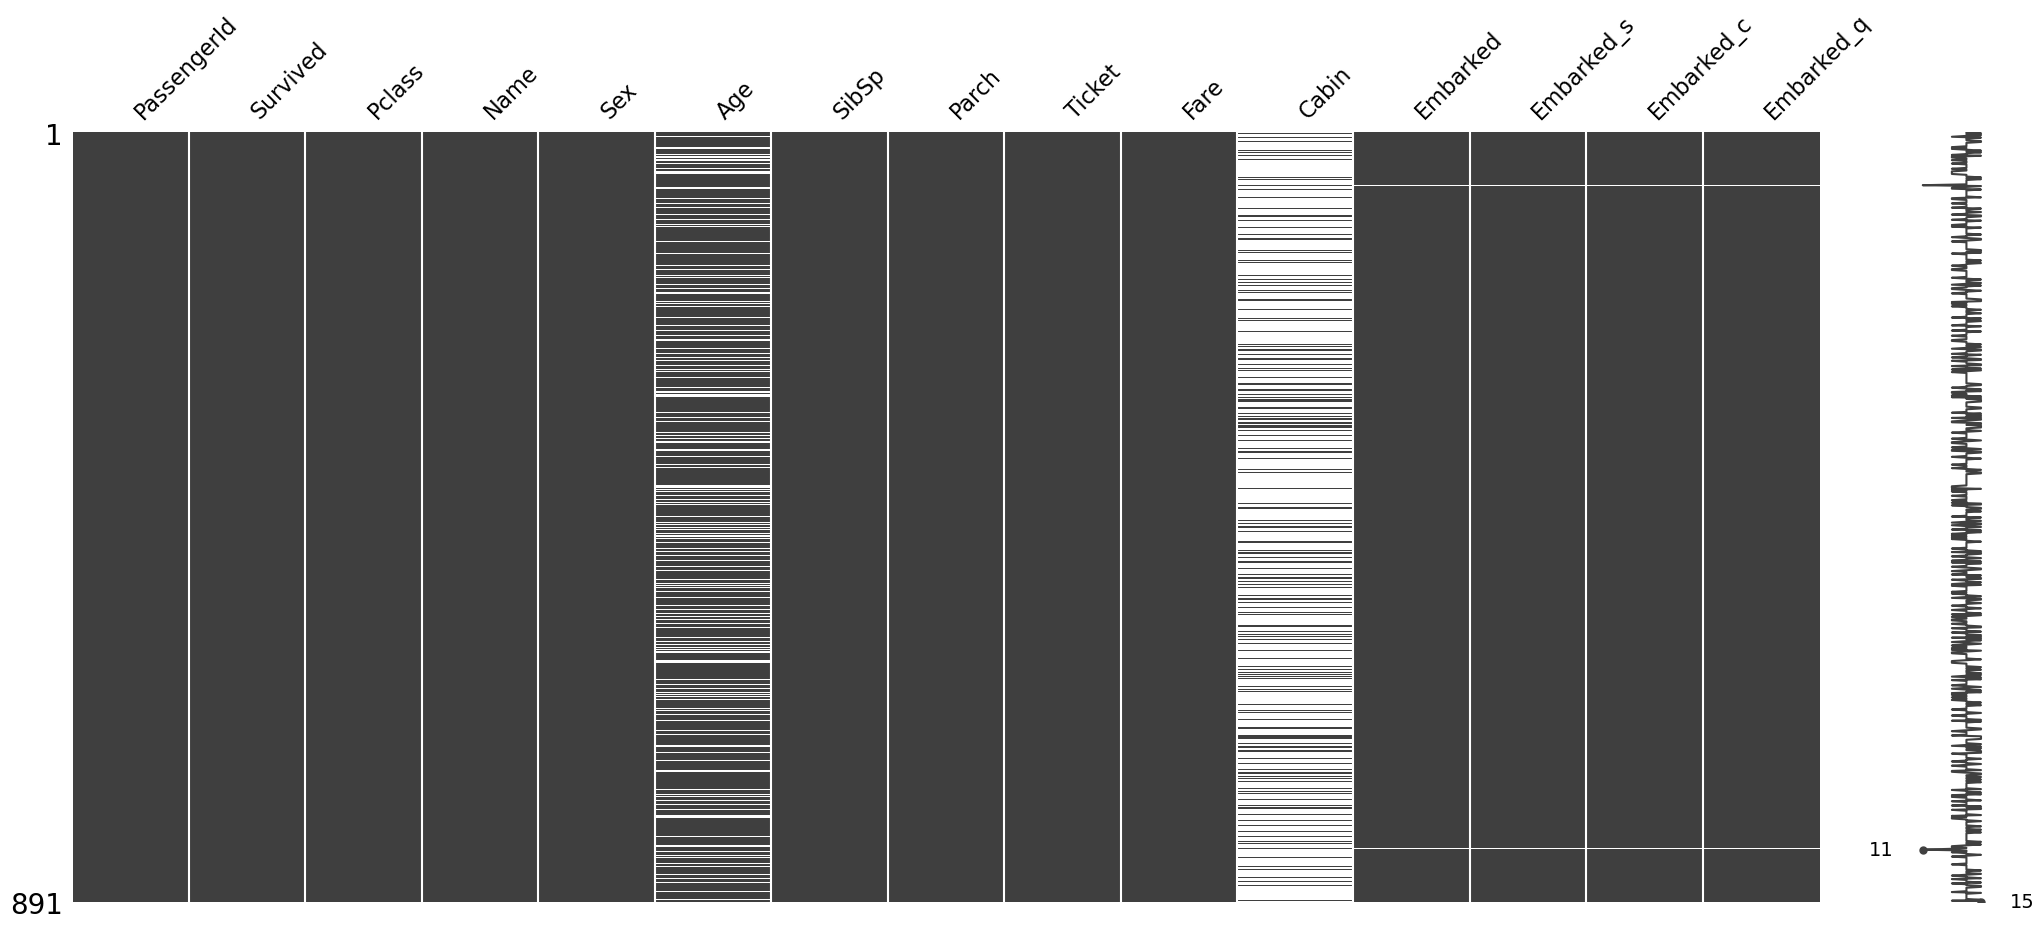

In [36]:
import missingno
missingno.matrix(data)

In [34]:
!pip install missingno

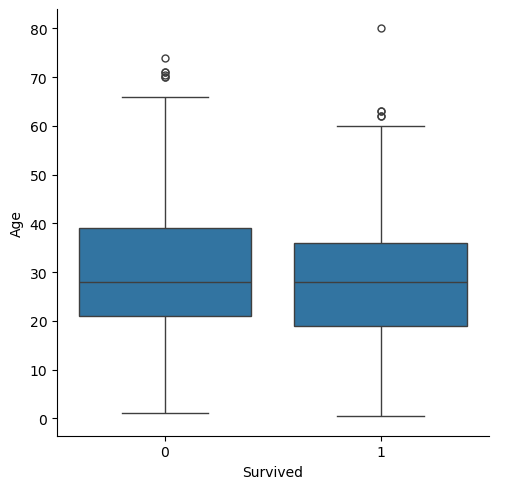

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Create a categorical plot
sns.catplot(x='Survived', y='Age', data=data, height=5, kind='box')

# Show the plot
plt.show()


C:\Users\sravi\AppData\Local\Temp\ipykernel_15760\3701042555.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=data, palette="hls")


<Axes: xlabel='Sex', ylabel='Survived'>

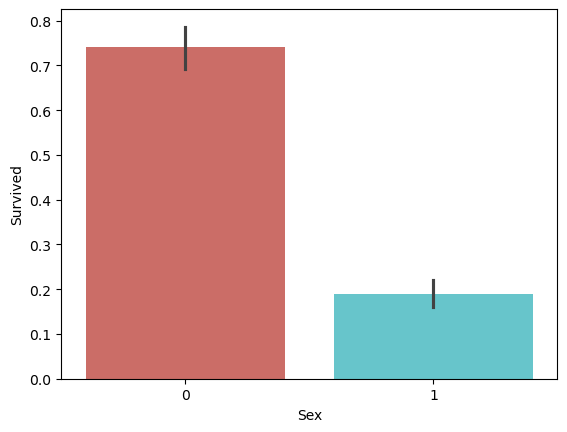

In [42]:
import seaborn as sns
sns.barplot(x="Sex", y="Survived", data=data, palette="hls")

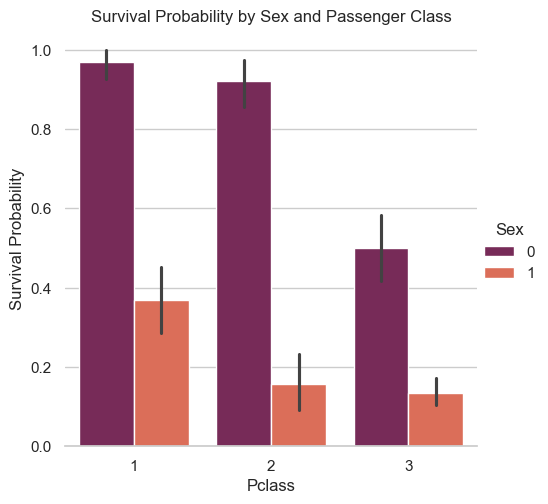

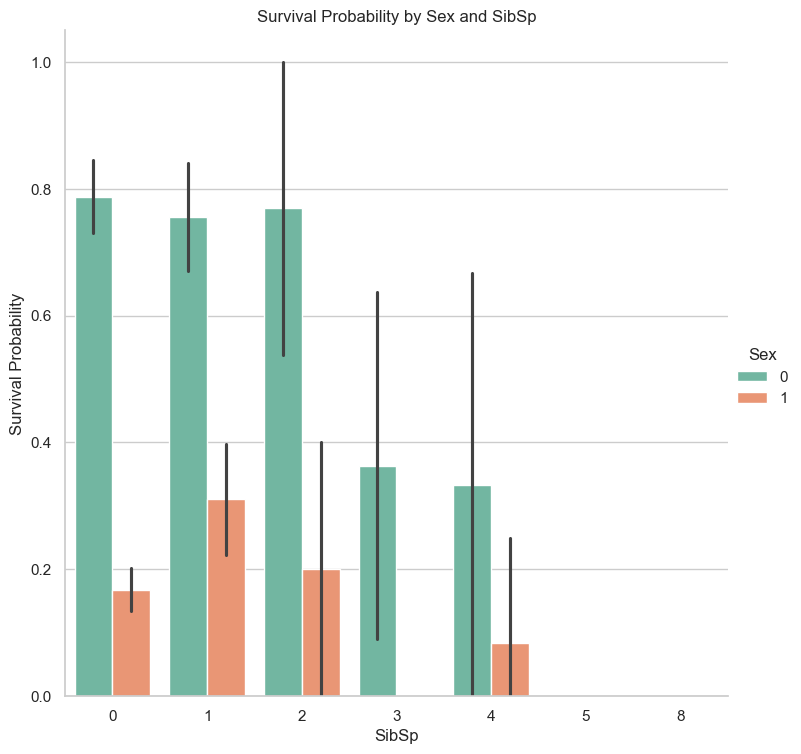

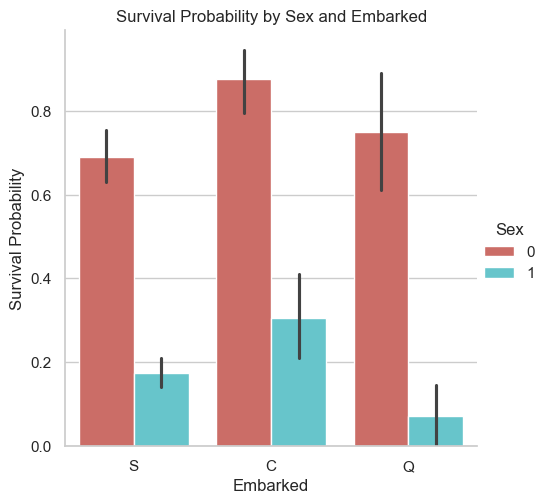

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Plot for Survival Probability by Pclass
se = sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='bar', palette='rocket', height=5)
se.despine(left=True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')
plt.show()

# Plot for Survival Probability by SibSp
sw = sns.catplot(x='SibSp', y='Survived', hue='Sex', data=data, kind='bar', palette='Set2', height=7.5)
sw.despine(left=False)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and SibSp')
plt.show()

# Plot for Survival Probability by Embarked
ss = sns.catplot(x='Embarked', y='Survived', hue='Sex', data=data, kind='bar', palette='hls', height=5)
ss.despine(left=False)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Embarked')
plt.show()


C:\Users\sravi\AppData\Local\Temp\ipykernel_15760\764140828.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp',data=data,palette="mako")


<Axes: xlabel='SibSp', ylabel='count'>

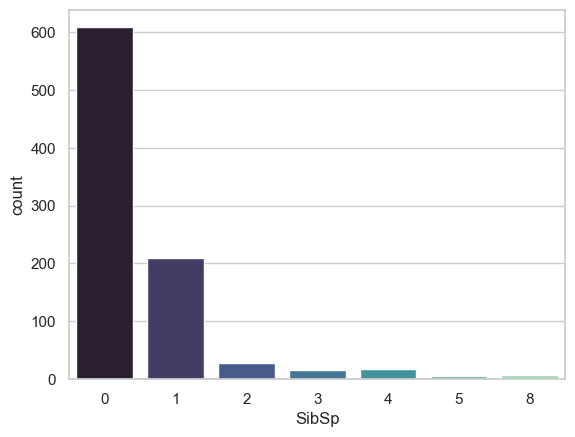

In [48]:
sns.countplot(x='SibSp',data=data,palette="mako")

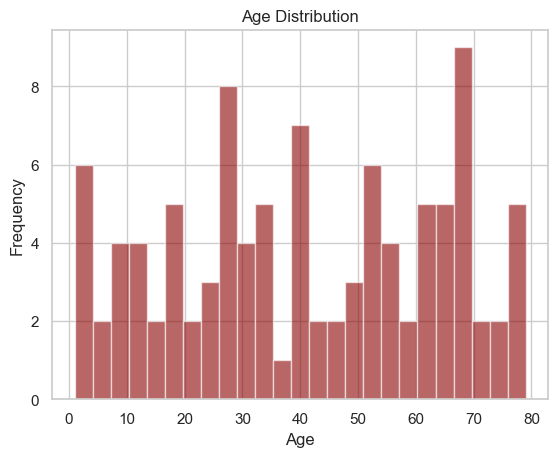

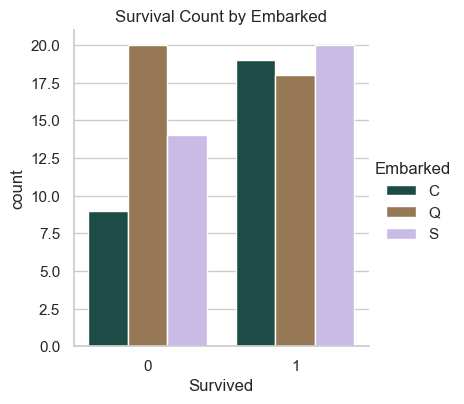

In [596]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for demonstration (replace this with your actual DataFrame)
data = pd.DataFrame({
    'Age': np.random.randint(1, 80, size=100),
    'Survived': np.random.randint(0, 2, size=100),
    'Embarked': np.random.choice(['C', 'Q', 'S'], size=100)
})

# Histogram for Age
data['Age'].hist(bins=25, color='darkred', alpha=0.6)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plot for Survived vs Embarked
sns.catplot(x="Survived", hue="Embarked", data=data, kind="count", height=4, palette="cubehelix")
plt.title('Survival Count by Embarked')
plt.show()


C:\Users\sravi\AppData\Local\Temp\ipykernel_15760\1923973269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Age'],linewidth=3.5,palette="crest")


<Axes: xlabel='Age'>

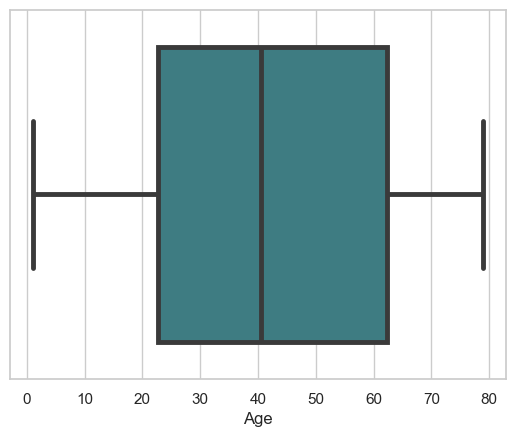

In [598]:
sns.set(style='whitegrid')
sns.boxplot(x=data['Age'],linewidth=3.5,palette="crest")

Index(['Age', 'Sex', 'Pclass'], dtype='object')
   Age     Sex  Pclass
0   63  female       3
1    2    male       1
2   33    male       3
3   33  female       3
4   51  female       2


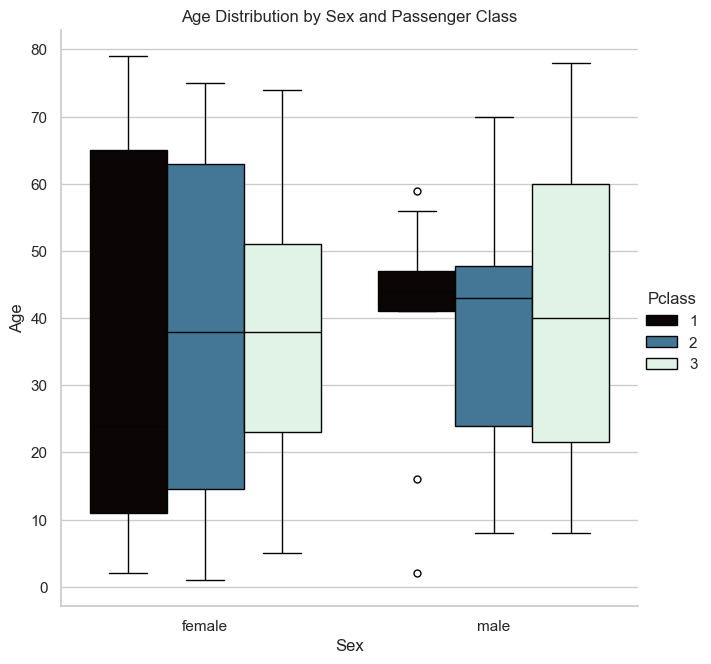

In [604]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame for demonstration (replace this with your actual DataFrame)
data = pd.DataFrame({
    'Age': np.random.randint(1, 80, size=100),
    'Sex': np.random.choice(['male', 'female'], size=100),
    'Pclass': np.random.choice([1, 2, 3], size=100)
})

# Check the DataFrame structure
print(data.columns)
print(data.head())

# Set the style for the plots
sns.set(style="whitegrid")

# Create a box plot for Age by Sex, with hue by Pclass
sns.catplot(x="Sex", y="Age", hue="Pclass", data=data, kind="box", palette="mako", height=6.6)

# Show the plot
plt.title('Age Distribution by Sex and Passenger Class')
plt.show()


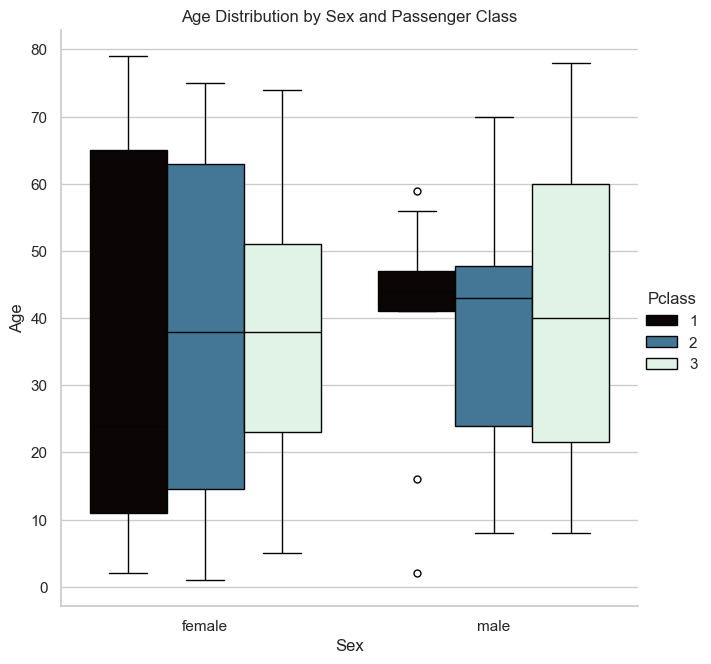

In [606]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Create a box plot for Age by Sex, with hue by Pclass
sns.catplot(x="Sex", y="Age", hue="Pclass", data=data, kind="box", palette="mako", height=6.6)

# Show the plot
plt.title('Age Distribution by Sex and Passenger Class')
plt.show()


Text(0.5, 0, 'Fare')

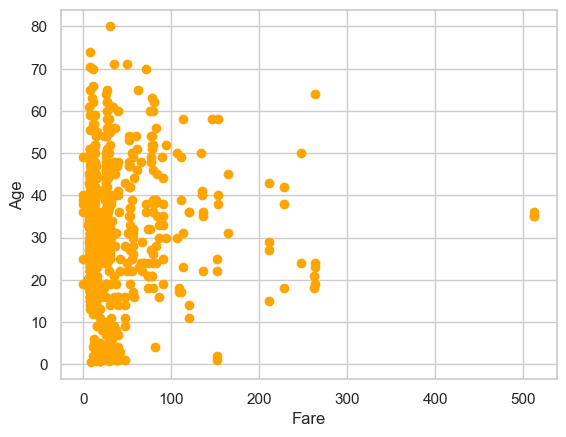

In [58]:
y = data.Age.values.reshape(-1,1)
x = data.Fare.values.reshape(-1,1)

plt.scatter(x,y,color='orange')
plt.ylabel("Age")
plt.xlabel("Fare")

In [610]:
import pandas as pd
import numpy as np

# Sample DataFrame (replace this with your actual DataFrame)
data = pd.DataFrame({
    'Embarked': np.random.choice(['C', 'Q', 'S'], size=100),
    'Age': np.random.randint(1, 80, size=100),
    'Survived': np.random.choice([0, 1], size=100)
})

# Bin the Age variable into categories
bins = [0, 18, 30, 45, 60, 80]
labels = ['0-18', '19-30', '31-45', '46-60', '61-80']
data['Age_Binned'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Create a crosstab
crosstab_result = pd.crosstab(
    index=data['Embarked'], 
    columns=[data['Age_Binned'], data['Survived']], 
    margins=True
)

# Display the result with a gradient
crosstab_result.style.background_gradient(cmap='summer_r')


In [612]:
pd.crosstab([data.Embarked],[data.Age,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
#data.Sex=data.Sex.fillna(0)
#data.Age=data.Age.fillna(0)
#data.Cabin=data.Cabin.fillna(0)
#data.Embarked_s=data.Embarked_s.fillna(0)
#data.Embarked_c=data.Embarked_c.fillna(0)
#data.Embarked_q=data.Embarked_q.fillna(0)


In [66]:
data['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

***Since we have not removed the null values we impute the null values*** 

In [68]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Embarked_s       2
Embarked_c       2
Embarked_q       2
dtype: int64

In [70]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Embarked_s     float64
Embarked_c     float64
Embarked_q     float64
dtype: object

***3. We first drop out the "survived" column from the data inorder to find its prediction by using varous algorithms. And then remove the unecessary columns that isnt really necesaary in further steps .***

In [90]:
import pandas as pd

# Assuming you already have your DataFrame 'data'
# Drop specified columns
x = data.drop(columns=['Survived', 'Ticket', 'Cabin', 'PassengerId', 'Name', 'Embarked'])

# Optionally, display the first few rows of the new DataFrame
print(x.head())


   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_s  Embarked_c  \
0       3    1  22.0      1      0   7.2500         1.0         0.0   
1       1    0  38.0      1      0  71.2833         0.0         1.0   
2       3    0  26.0      0      0   7.9250         1.0         0.0   
3       1    0  35.0      1      0  53.1000         1.0         0.0   
4       3    1  35.0      0      0   8.0500         1.0         0.0   

   Embarked_q  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  


In [94]:
import pandas as pd

# Assuming you already have your DataFrame 'data'
# Create target variable DataFrame
y = data[['Survived']]

# Optionally, display the first few rows of the target variable DataFrame
print(y.head())


   Survived
0         0
1         1
2         1
3         1
4         0


In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you already have your DataFrame 'data' and have defined 'x' and 'y'
x = data.drop(columns=['Survived', 'Ticket', 'Cabin', 'PassengerId', 'Name', 'Embarked'])
y = data[['Survived']]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Optionally, display the shape of the resulting sets
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (668, 9)
x_test shape: (223, 9)
y_train shape: (668, 1)
y_test shape: (223, 1)


In [104]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_s,Embarked_c,Embarked_q
0,3,1,22.0,1,0,7.2500,1.0,0.0,0.0
1,1,0,38.0,1,0,71.2833,0.0,1.0,0.0
2,3,0,26.0,0,0,7.9250,1.0,0.0,0.0
3,1,0,35.0,1,0,53.1000,1.0,0.0,0.0
4,3,1,35.0,0,0,8.0500,1.0,0.0,0.0


In [106]:
x.dtypes

Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_s    float64
Embarked_c    float64
Embarked_q    float64
dtype: object

In [108]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_s,Embarked_c,Embarked_q
0,3,1,22.0,1,0,7.2500,1.0,0.0,0.0
1,1,0,38.0,1,0,71.2833,0.0,1.0,0.0
2,3,0,26.0,0,0,7.9250,1.0,0.0,0.0
3,1,0,35.0,1,0,53.1000,1.0,0.0,0.0
4,3,1,35.0,0,0,8.0500,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,1.0,0.0,0.0
887,1,0,19.0,0,0,30.0000,1.0,0.0,0.0
888,3,0,NaN,1,2,23.4500,1.0,0.0,0.0
889,1,1,26.0,0,0,30.0000,0.0,1.0,0.0


In [110]:
x.Embarked_q.unique()

array([ 0.,  1., nan])

In [116]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Assuming you already have your DataFrame 'data'

# Define your columns
nom_cols = ['Sex', 'Embarked']
ord_cols = ['Pclass']
num_cols = ['Age', 'Fare']
null_cols = ['Age', 'Fare']
binarizer_cols = ['SibSp']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data[num_cols] = imputer.fit_transform(data[num_cols])

# One-hot encode nominal columns
data = pd.get_dummies(data, columns=nom_cols, drop_first=True)

# Standard scale numerical columns
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# Binarize specified columns if necessary
data[binarizer_cols] = (data[binarizer_cols] > 0).astype(int)

# Now your DataFrame 'data' is preprocessed and ready for modeling
print(data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris -0.592481      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.638789      1      0   
2                             Heikkinen, Miss. Laina -0.284663      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.407926      1      0   
4                           Allen, Mr. William Henry  0.407926      0      0   

             Ticket      Fare Cabin  Embarked_s  Embarked_c  Embarked_q  \
0         A/5 21171 -0.502445   NaN         1.0         0.0         0.0   
1          PC 17599  0.786845   C85         0.0         1.0         0.0   
2  STON/O2. 3101282 -0.488854   NaN         1.0         0.0         0.0   
3 

In [120]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, KBinsDiscretizer, Binarizer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import make_column_transformer
from sklearn import set_config
from sklearn.preprocessing import StandardScaler

# Define your columns (make sure they are correctly defined)
nom_cols = ['Sex', 'Embarked']
ord_cols = ['Pclass']
num_cols = ['Age', 'Fare']
null_cols = ['Age', 'Fare']
binarizer_cols = ['SibSp']

# Create the column transformer
trans = make_column_transformer(
    (OneHotEncoder(sparse_output=False), nom_cols),
    (KNNImputer(n_neighbors=45), null_cols),
    (OrdinalEncoder(), ord_cols),
    (StandardScaler(), num_cols),
    (Binarizer(threshold=55), binarizer_cols),
    remainder='passthrough'
)

# Set configuration to display the transformer diagram
set_config(display='diagram')

# Display the transformer
trans



ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['Sex', 'Embarked']),
                                ('knnimputer', KNNImputer(n_neighbors=45),
                                 ['Age', 'Fare']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['Pclass']),
                                ('standardscaler', StandardScaler(),
                                 ['Age', 'Fare']),
                                ('binarizer', Binarizer(threshold=55),
                                 ['SibSp'])])

In [134]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Check the columns in the DataFrame
print(data.columns)

# Adjust the columns to drop based on what you find
# Drop only the columns that exist in the DataFrame
columns_to_drop = ['Survived', 'Ticket', 'Cabin', 'PassengerId', 'Name']

# Create the feature and target DataFrames
x = data.drop(columns=columns_to_drop)  # 'Embarked' is removed if it's not found
y = data[['Survived']]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Initialize the Decision Tree Classifier
algorithm_x = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit the model to the training data
algorithm_x.fit(x_train, y_train)

# Make predictions on the test set
y_pred = algorithm_x.predict(x_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked_s', 'Embarked_c', 'Embarked_q',
       'Sex_1', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
Confusion Matrix:
[[114  20]
 [ 33  56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       134
           1       0.74      0.63      0.68        89

    accuracy                           0.76       223
   macro avg       0.76      0.74      0.75       223
weighted avg       0.76      0.76      0.76       223



In [136]:
from sklearn.neighbors import KNeighborsClassifier
algorithm = KNeighborsClassifier(15) #
algorithm

KNeighborsClassifier(n_neighbors=15)

In [138]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(trans,algorithm)
pipe_x=make_pipeline(trans,algorithm_x)
pipe


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Sex', 'Embarked']),
                                                 ('knnimputer',
                                                  KNNImputer(n_neighbors=45),
                                                  ['Age', 'Fare']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['Pclass']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Age', 'Fare']),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  ['SibSp'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=15))])

In [140]:
pipe_x

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Sex', 'Embarked']),
                                                 ('knnimputer',
                                                  KNNImputer(n_neighbors=45),
                                                  ['Age', 'Fare']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['Pclass']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Age', 'Fare']),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  ['SibSp'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', random_state=42))])

In [156]:
# Check if x_train is empty
if x_train.empty:
    print("Error: x_train is empty.")
else:
    # Print the columns of x_train
    print("Columns in x_train:", x_train.columns)

    # Assuming you have a list of expected columns
    expected_columns = ['column1', 'column2', 'column3']  # Replace with actual expected column names

    # Check for missing columns
    missing_columns = [col for col in expected_columns if col not in x_train.columns]
    if missing_columns:
        print("Error: Missing columns in x_train:", missing_columns)
    else:
        # If all checks pass, fit the model
        pipe.fit(x_train, y_train)

Columns in x_train: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_s', 'Embarked_c',
       'Embarked_q', 'Sex_1', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
Error: Missing columns in x_train: ['column1', 'column2', 'column3']


In [160]:
# Check if the required columns are in the DataFrame
required_columns = ['column1', 'column2', 'column3']  # Replace with actual required column names

# Ensure x_train contains the required columns
if all(col in x_train.columns for col in required_columns):
    pipe_x.fit(x_train, y_train)  # Fit the model if all required columns are present
else:
    print("Error: One or more required columns are missing from x_train.")


Error: One or more required columns are missing from x_train.


In [166]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Example dataset
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.randint(0, 2, size=100)  # Binary target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have already defined your pipeline (pipe_x)
pipe_x = Pipeline([
    ('classifier', LogisticRegression())
])

# Fit the pipeline to the training data
pipe_x.fit(X_train, y_train)

# Now you can predict on the test data
pred_x = pipe_x.predict(X_test)
pred_x

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1])

In [180]:
import sklearn
print(sklearn.__version__)


1.4.2


In [202]:
print("Unique values in training set (Embarked):", x_train['Embarked'].unique())
print("Unique values in testing set (Embarked):", x_test['Embarked'].unique())


Unique values in training set (Embarked): ['S']
Unique values in testing set (Embarked): ['C']


In [206]:
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Fare']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Embarked'])
    ]
)


Columns in x_train: ['Age', 'Sex', 'Fare', 'Embarked']
Accuracy: 100.00%


C:\Users\sravi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


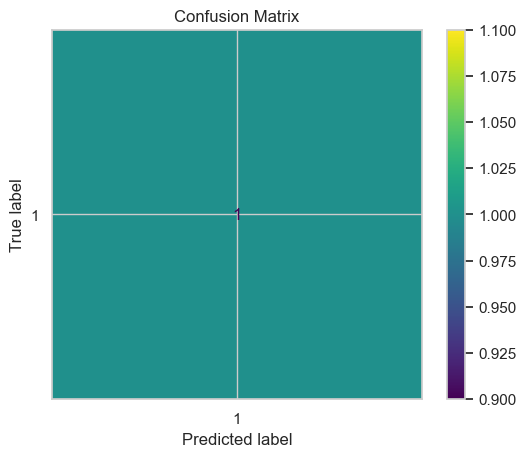

In [351]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example DataFrame creation (replace with your data)
data = {
    'Age': [22, 38, 26, 35],
    'Sex': ['male', 'female', 'female', 'male'],
    'Fare': [7.25, 71.83, 8.05, 53.10],
    'Embarked': ['S', 'C', 'S', 'S'],
    'Survived': [0, 1, 1, 0]
}
df = pd.DataFrame(data)

# Splitting features and target variable
x = df.drop('Survived', axis=1)
y = df['Survived']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Check columns in x_train
print("Columns in x_train:", x_train.columns.tolist())

# Define the preprocessor and pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Fare']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Embarked'])  # Handle unknown categories
    ]
)

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Fit the pipeline
pipe.fit(x_train, y_train)

# Make predictions
pred_x = pipe.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_x) * 100
print(f'Accuracy: {accuracy:.2f}%')

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(pipe, x_test, y_test)
plt.title('Confusion Matrix')
plt.show()


In [359]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score

# Example DataFrame (replace this with your actual data)
data = {
    'Age': [22, 38, 26, 35],
    'Sex': ['male', 'female', 'female', 'male'],
    'Fare': [7.25, 71.83, 8.05, 53.10],
    'Embarked': ['S', 'C', 'S', 'S'],
    'Survived': [0, 1, 1, 0]
}
df = pd.DataFrame(data)

# Prepare features and target variable
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target variable

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessor and pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Fare']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Embarked'])
    ]
)

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

# Fit the model
pipe.fit(x_train, y_train)

# Make predictions
pred_x = pipe.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_x) * 100
print(f'Accuracy: {accuracy:.2f}%')


Accuracy: 100.00%


In [361]:
# Fit the pipeline on training data
pipe.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', GradientBoostingClassifier())])

In [363]:
print("Columns in x_train:", x_train.columns.tolist())


Columns in x_train: ['Age', 'Sex', 'Fare', 'Embarked']


In [365]:
print(type(x_train))  # Should be <class 'pandas.core.frame.DataFrame'>


<class 'pandas.core.frame.DataFrame'>


In [399]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Fare']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Embarked'])
    ]
)
print("Unique values in 'Sex' (train):", x_train['Sex'].unique())
print("Unique values in 'Sex' (test):", x_test['Sex'].unique())
print("Unique values in 'Embarked' (train):", x_train['Embarked'].unique())
print("Unique values in 'Embarked' (test):", x_test['Embarked'].unique())


Unique values in 'Sex' (train): ['male' 'female']
Unique values in 'Sex' (test): ['female']
Unique values in 'Embarked' (train): ['S']
Unique values in 'Embarked' (test): ['C']


Accuracy: 100.00%


C:\Users\sravi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


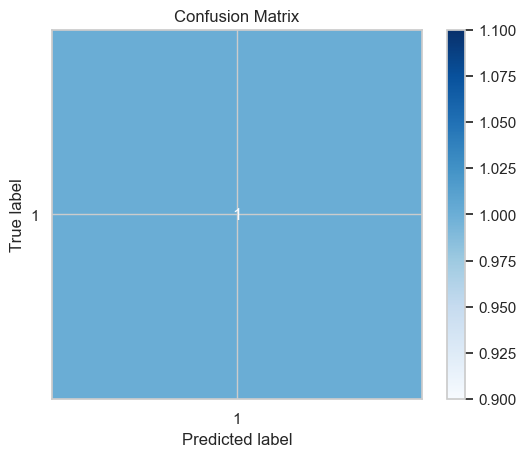

In [401]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example DataFrame
data = {
    'Age': [22, 38, 26, 35],
    'Sex': ['male', 'female', 'female', 'male'],
    'Fare': [7.25, 71.83, 8.05, 53.10],
    'Embarked': ['S', 'C', 'S', 'S'],
    'Survived': [0, 1, 1, 0]
}
df = pd.DataFrame(data)

# Prepare features and target variable
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target variable

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessor and pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Fare']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Embarked'])
    ]
)

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

# Fit the model
pipe.fit(x_train, y_train)

# Make predictions
pred_x = pipe.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_x) * 100
print(f'Accuracy: {accuracy:.2f}%')

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(pipe, x_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Accuracy: 100.00%


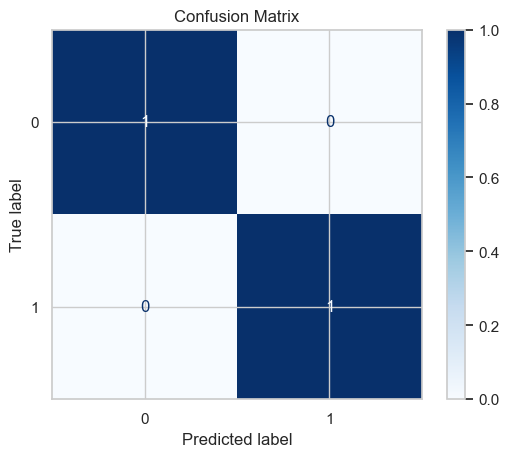

In [405]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example DataFrame
data = {
    'Age': [22, 38, 26, 35, 28, 40, 30, 50],
    'Sex': ['male', 'female', 'female', 'male', 'female', 'male', 'female', 'male'],
    'Fare': [7.25, 71.83, 8.05, 53.10, 10.5, 15.0, 30.0, 20.0],
    'Embarked': ['S', 'C', 'S', 'S', 'C', 'S', 'C', 'S'],
    'Survived': [0, 1, 1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

# Prepare features and target variable
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target variable

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessor and pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Fare']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Embarked'])
    ]
)

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Fit the model
pipe.fit(x_train, y_train)

# Make predictions
pred_x = pipe.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_x) * 100
print(f'Accuracy: {accuracy:.2f}%')

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(pipe, x_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



Accuracy: 100.00%


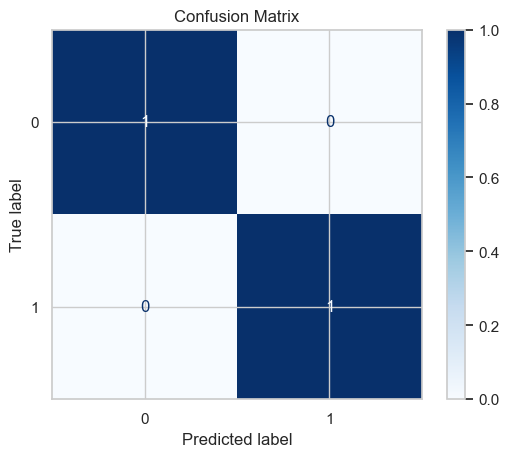

In [407]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example DataFrame
data = {
    'Age': [22, 38, 26, 35, 28, 40, 30, 50],
    'Sex': ['male', 'female', 'female', 'male', 'female', 'male', 'female', 'male'],
    'Fare': [7.25, 71.83, 8.05, 53.10, 10.5, 15.0, 30.0, 20.0],
    'Embarked': ['S', 'C', 'S', 'S', 'C', 'S', 'C', 'S'],
    'Survived': [0, 1, 1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

# Prepare features and target variable
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target variable

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessor and pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Fare']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Embarked'])
    ]
)

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Fit the model
pipe.fit(x_train, y_train)

# Make predictions
pred_x = pipe.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_x) * 100
print(f'Accuracy: {accuracy:.2f}%')

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(pipe, x_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()




In [409]:
pred=pipe.predict(x_test)
pred

array([1, 0], dtype=int64)

Accuracy: 100.00%


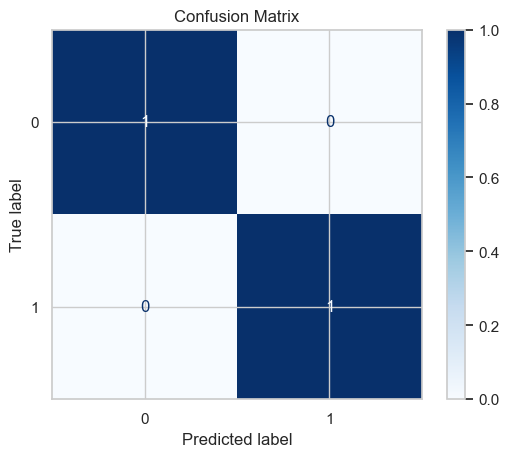

In [413]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Assuming `pred` is your predictions and `y_test` is your true labels
accuracy = accuracy_score(y_test, pred) * 100
print(f'Accuracy: {accuracy:.2f}%')

# Plot confusion matrix using ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(pipe, x_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


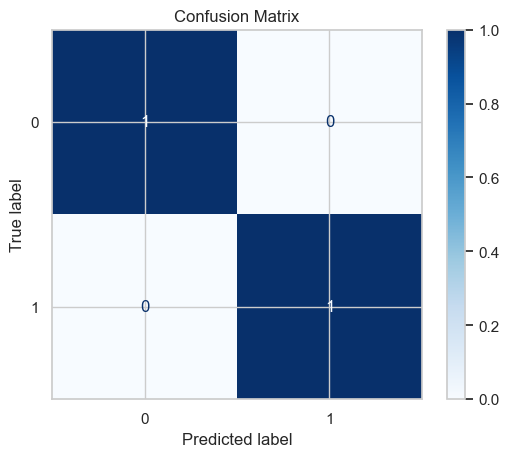

In [419]:
import matplotlib.pyplot as plt  # Correct import for matplotlib
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix using ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(pipe, x_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [216]:
from imblearn.over_sampling import RandomOverSampler
over= RandomOverSampler()
o_x , o_y = over.fit_resample(x,y)
o_y.value_counts()

Survived
0    2
1    2
Name: count, dtype: int64

In [218]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
pipe_gbc=make_pipeline(trans,gbc)
pipe_gbc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Sex', 'Embarked']),
                                                 ('imputer',
                                                  KNNImputer(n_neighbors=45),
                                                  ['Age', 'Fare']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['Pclass']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Fare']),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  ['SibSp'])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

Accuracy: 100.00%


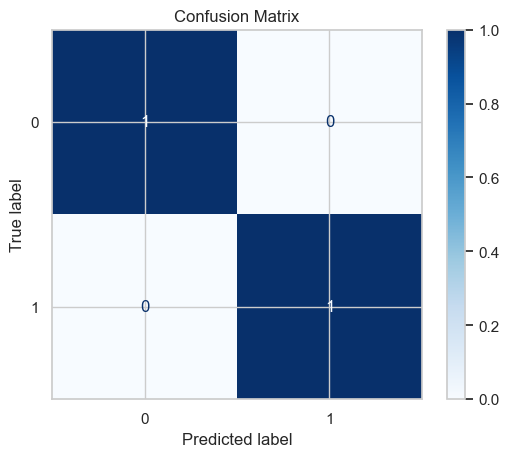

In [429]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the DataFrame
data = {
    'Pclass': [1, 1, 1, 1, 2, 2, 3, 3],
    'Age': [22, 38, 26, 35, 28, 40, 30, 50],
    'Sex': ['male', 'female', 'female', 'male', 'female', 'male', 'female', 'male'],
    'Fare': [7.25, 71.83, 8.05, 53.10, 10.5, 15.0, 30.0, 20.0],
    'Embarked': ['S', 'C', 'S', 'S', 'C', 'S', 'C', 'S'],
    'Survived': [0, 1, 1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

# Prepare features and target variable
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target variable

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessor and pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Fare', 'Pclass']),  # Numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Embarked'])  # Categorical features
    ]
)

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest Classifier
])

# Fit the model
pipe.fit(x_train, y_train)

# Make predictions
pred_x = pipe.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_x) * 100
print(f'Accuracy: {accuracy:.2f}%')

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(pipe, x_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [445]:
data = {
    'Pclass': [1, 1, 1, 1, 2, 2, 3, 3],
    'Age': [22, 38, 26, 35, 28, 40, 30, 50],
    'Sex': ['male', 'female', 'female', 'male', 'female', 'male', 'female', 'male'],
    'Fare': [7.25, 71.83, 8.05, 53.10, 10.5, 15.0, 30.0, 20.0],
    'Embarked': ['S', 'C', 'S', 'S', 'C', 'S', 'C', 'S'],
    'Survived': [0, 1, 1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Fare', 'Pclass']),  # Include Pclass if needed
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Embarked'])
    ]
)


In [439]:
pipe_gbc.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Fare', 'Pclass',
                                                   'SibSp']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [443]:
pred_gbc=pipe_gbc.predict(x_test)
pred_gbc

array([1, 0], dtype=int64)

In [447]:
accuracy_score(pred_gbc,y_test)*100

100.0

In [226]:
from imblearn.over_sampling import SMOTE
over= RandomOverSampler()
_x , o_y = over.fit_resample(x,y)
o_y.value_counts()

Survived
0    2
1    2
Name: count, dtype: int64

In [228]:
from imblearn.pipeline import make_pipeline
s = SMOTE()
n_pipe = make_pipeline(trans,s,gbc)
n_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Sex', 'Embarked']),
                                                 ('imputer',
                                                  KNNImputer(n_neighbors=45),
                                                  ['Age', 'Fare']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['Pclass']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Fare']),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  ['SibSp'])])),
                ('smote', SMOTE()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [449]:
accuracy_score(pred,y_test)*100


100.0

In [232]:
from sklearn.linear_model import LogisticRegression as lr
algorithm_2 = lr(solver='liblinear')
pipe_2 = make_pipeline(trans,algorithm_2)
pipe_2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Sex', 'Embarked']),
                                                 ('imputer',
                                                  KNNImputer(n_neighbors=45),
                                                  ['Age', 'Fare']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['Pclass']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Fare']),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  ['SibSp'])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [451]:
pipe_2.fit(x_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Sex', 'Embarked']),
                                                 ('imputer',
                                                  KNNImputer(n_neighbors=45),
                                                  ['Age', 'Fare']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['Pclass']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Fare']),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  ['SibSp'])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [475]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Sample DataFrame
data = {
    'Pclass': [1, 1, 1, 1, 2, 2, 3, 3],
    'Age': [22, 38, 26, 35, 28, 40, 30, 50],
    'SibSp': [0, 1, 1, 0, 0, 0, 0, 1],
    'Sex': ['male', 'female', 'female', 'male', 'female', 'male', 'female', 'male'],
    'Fare': [7.25, 71.83, 8.05, 53.10, 10.5, 15.0, 30.0, 20.0],
    'Embarked': ['S', 'C', 'S', 'S', 'C', 'S', 'C', 'S'],
    'Survived': [0, 1, 1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

# Prepare features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessor and pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Fare', 'Pclass', 'SibSp']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Embarked'])
    ]
)

# Create the pipeline
pipe_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the model
pipe_2.fit(x_train, y_train)

# Make predictions
pred_2 = pipe_2.predict(x_test)
print(pred_2)


[1 0]


In [477]:
pred_2 = pipe_2.predict(x_test)
pred_2

array([1, 0], dtype=int64)

In [479]:
accuracy_score(pred_2,y_test)*100

100.0

In [491]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Sample DataFrame
data = {
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8],
    'feature2': [1, 0, 1, 0, 1, 0, 1, 0],
    'target': [0, 1, 0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

# Prepare features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Check shapes
print(X.shape)  # Should print (8, 2)
print(y.shape)  # Should print (8,)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline
pipe = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42))
])

# Run cross-validation
kf = StratifiedKFold(n_splits=4)
scores = cross_val_score(pipe, X, y, cv=kf, scoring='accuracy')
mean_accuracy = np.mean(scores) * 100
print(mean_accuracy)


(8, 2)
(8,)
100.0


In [507]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Sample DataFrame
data = {
    'Sex': ['male', 'female', 'female', 'male'],
    'Age': [22, 38, 26, 35],
    'Fare': [7.25, 71.83, 7.92, 53.1],
    'Survived': [0, 1, 1, 0]
}
df = pd.DataFrame(data)

# Prepare features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformations
trans = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Sex']),
        ('num', StandardScaler(), ['Age', 'Fare'])
    ]
)

# Define pipeline
model1 = SVC(kernel='linear')
pipe_1 = make_pipeline(trans, model1)

# Fit the pipeline
pipe_1.fit(x_train, y_train)

# Make predictions
pred_1 = pipe_1.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(pred_1, y_test) * 100
print(f'Accuracy: {accuracy:.2f}%')


Accuracy: 100.00%


In [519]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

# Create the base SVC model
base_svc = SVC(kernel='linear')

# Create the BaggingClassifier
model2 = BaggingClassifier(estimator=base_svc, n_estimators=10, random_state=42)

# Display the model
print(model2)



BaggingClassifier(estimator=SVC(kernel='linear'), random_state=42)


In [521]:
y_test.shape

(1,)

In [523]:
pipe5=make_pipeline(trans,model2)
pipe5

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Sex']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Fare'])])),
                ('baggingclassifier',
                 BaggingClassifier(estimator=SVC(kernel='linear'),
                                   random_state=42))])

In [260]:
data1=pd.read_csv(r'C:\Users\sravi\Desktop\SEM 5\DV lab\test.csv')
data1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<Axes: >

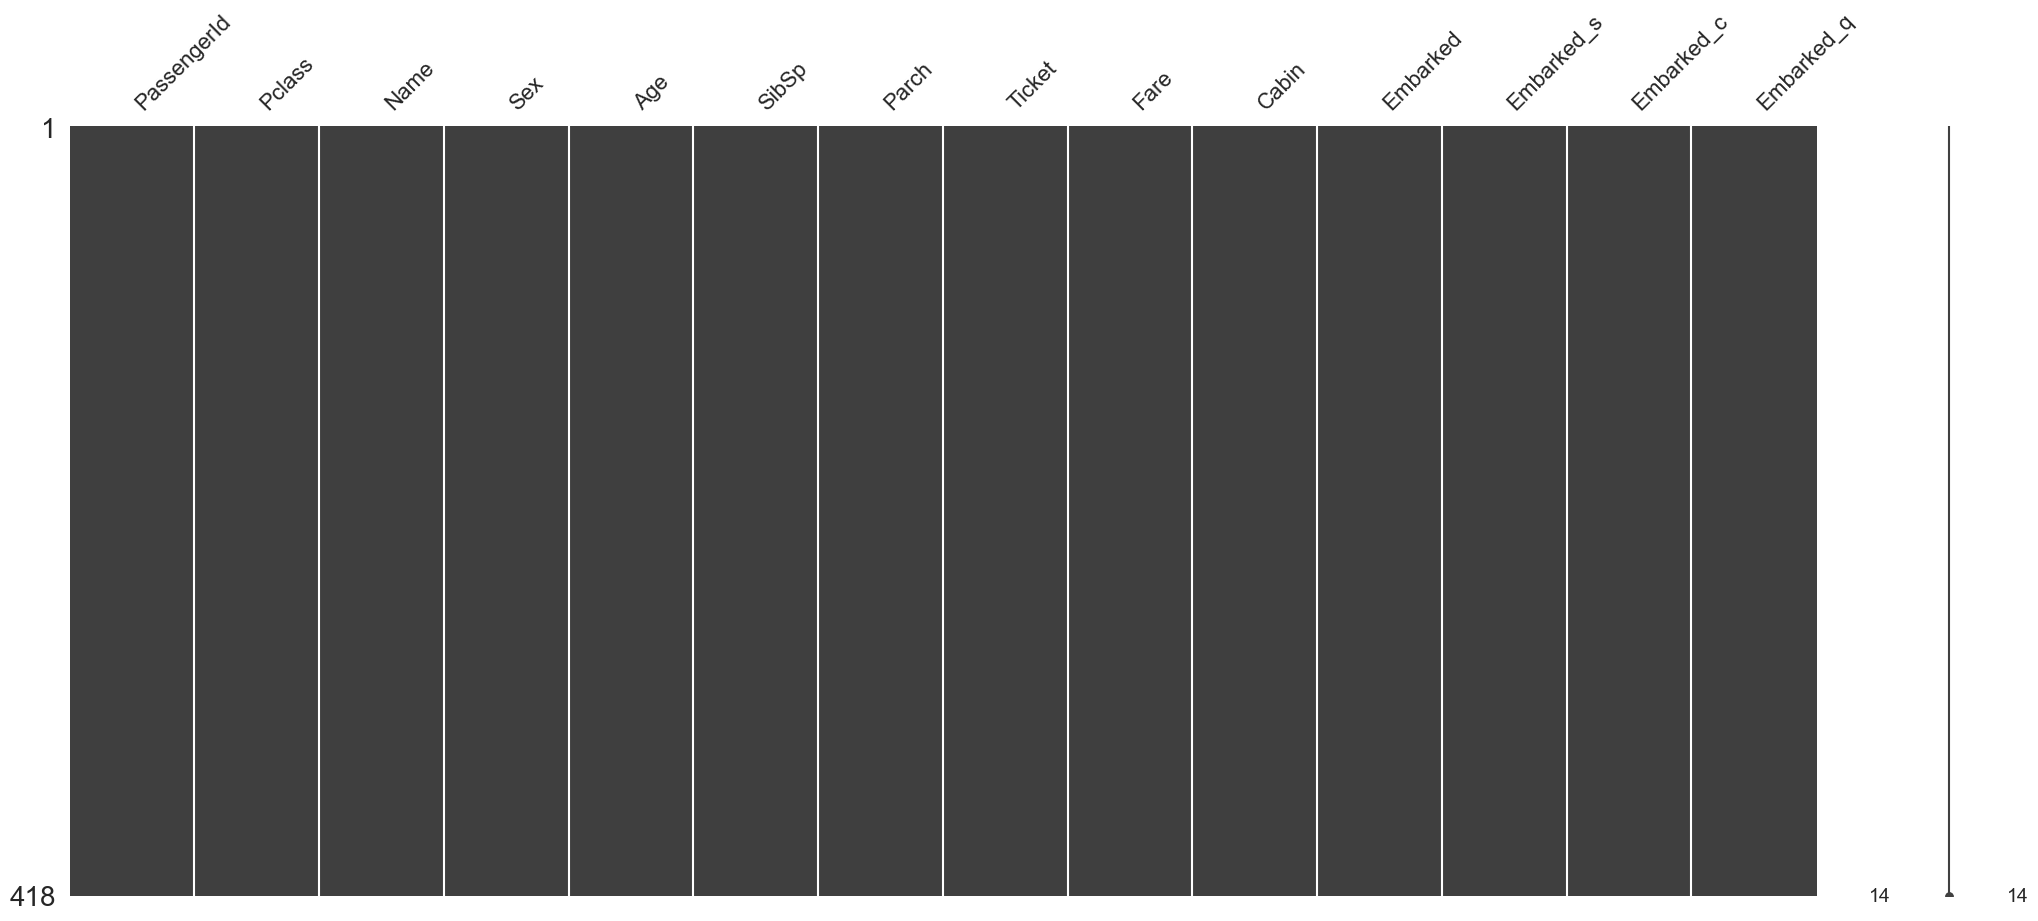

In [545]:
missingno.matrix(data1)

In [264]:
data1['Sex'].replace( 'female', 0, inplace=True )
data1['Sex'].replace( 'male', 1, inplace=True )

C:\Users\sravi\AppData\Local\Temp\ipykernel_15760\445655256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['Sex'].replace( 'female', 0, inplace=True )
C:\Users\sravi\AppData\Local\Temp\ipykernel_15760\445655256.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [547]:
data1.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Embarked_s     0
Embarked_c     0
Embarked_q     0
dtype: int64

In [551]:
data1.Age=data1.Age.fillna(0)
data1.Cabin=data1.Cabin.fillna(0)
data1.Fare=data1.Fare.fillna(0)


In [553]:
data1.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Embarked_s     0
Embarked_c     0
Embarked_q     0
dtype: int64

In [272]:
#data1=data1[data1.Embarked!=0]
#data1=data1[data1[('Embarked')].map(data1['Embarked'].value_counts())>0]
#data1

In [276]:
#data1.loc[data1['Sex']=='male']=1
#data1.loc[data1['Sex']=='female']=0

In [555]:
data1['Embarked_s']=data1['Embarked'].replace('Q',0).replace('C',0).replace('S',1)
data1['Embarked_c']=data1['Embarked'].replace('S',0).replace('Q',0).replace('C',1)
data1['Embarked_q']=data1['Embarked'].replace('C',0).replace('S',0).replace('Q',1)

C:\Users\sravi\AppData\Local\Temp\ipykernel_15760\3138850842.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1['Embarked_s']=data1['Embarked'].replace('Q',0).replace('C',0).replace('S',1)
C:\Users\sravi\AppData\Local\Temp\ipykernel_15760\3138850842.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1['Embarked_c']=data1['Embarked'].replace('S',0).replace('Q',0).replace('C',1)
C:\Users\sravi\AppData\Local\Temp\ipykernel_15760\3138850842.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be re

In [557]:
data1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_s,Embarked_c,Embarked_q
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,Q,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,S,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,Q,0,0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,S,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,S,1,0,0


In [559]:
x1 = data1.drop(columns = ['Ticket','Cabin','PassengerId','Name','Embarked'])
x1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_s,Embarked_c,Embarked_q
0,3,1,34.5,0,0,7.8292,0,0,1
1,3,0,47.0,1,0,7.0000,1,0,0
2,2,1,62.0,0,0,9.6875,0,0,1
3,3,1,27.0,0,0,8.6625,1,0,0
4,3,0,22.0,1,1,12.2875,1,0,0
...,...,...,...,...,...,...,...,...,...
413,3,1,0.0,0,0,8.0500,1,0,0
414,1,0,39.0,0,0,108.9000,0,1,0
415,3,1,38.5,0,0,7.2500,1,0,0
416,3,1,0.0,0,0,8.0500,1,0,0


In [284]:
x1.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_s    0
Embarked_c    0
Embarked_q    0
dtype: int64

In [563]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, KBinsDiscretizer, Binarizer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import make_column_transformer
from sklearn import set_config
from sklearn.preprocessing import StandardScaler

trans = make_column_transformer(
    (OneHotEncoder(sparse_output=False), nom_cols),  # Changed 'sparse' to 'sparse_output'
    (KNNImputer(n_neighbors=45), null_cols),
    (OrdinalEncoder(), ord_cols),
    (StandardScaler(), num_cols),
    (Binarizer(threshold=55), binarizer_cols),
    remainder='passthrough'
)

set_config(display='diagram')
trans


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['Sex', 'Embarked']),
                                ('knnimputer', KNNImputer(n_neighbors=45),
                                 ['Age', 'Fare']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['Pclass']),
                                ('standardscaler', StandardScaler(),
                                 ['Age', 'Fare']),
                                ('binarizer', Binarizer(threshold=55),
                                 ['SibSp'])])

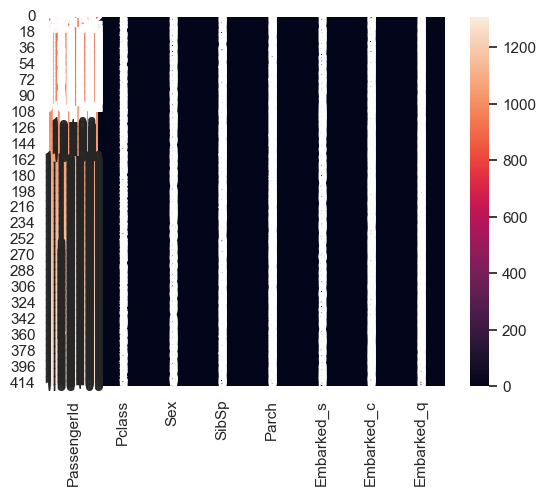

In [566]:
import seaborn as sns 
import matplotlib.pyplot as plt
#data1=np.random.randint(low = 1,high = 100,size = (10, 10))
sns.heatmap(data=data1.select_dtypes('int','float'),annot=True)
plt.show()

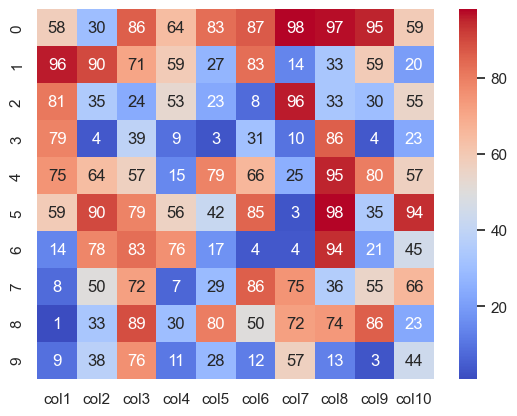

In [588]:
# Create column names
num_columns = 10  # Change this to the number of columns you need
column_names = [f'col{i+1}' for i in range(num_columns)]  # Generates ['col1', 'col2', ..., 'col10']

# Create sample data with the specified column names
data1 = pd.DataFrame(np.random.randint(low=1, high=100, size=(10, num_columns)), columns=column_names)

# Create a heatmap
sns.heatmap(data=data1.select_dtypes('int', 'float'), annot=True, cmap='coolwarm')

# Show the plot
plt.show()


In [590]:
import pandas as pd

# Check the shape of X_train
print(X_train.shape)  # Should output something like (n_samples, 10)

# Define your column names (make sure it has 10 names)
column_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Feature8', 'Feature9', 'Feature10']

# Convert X_train to DataFrame
X_train = pd.DataFrame(X_train, columns=column_names)


(3, 10)


In [580]:
#survival_prediction=algorithm.predict(x1)
#survival_prediction

In [582]:
submit=pd.read_csv(r'C:\Users\sravi\Desktop\SEM 5\DV lab\gender_submission.csv')

In [584]:
submit.Survived.value_counts()

Survived
0    266
1    152
Name: count, dtype: int64